In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label = data['label']
label

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [5]:
del data['label']

In [6]:
data.shape

(42000, 784)

### Standardizing the data

In [7]:
from sklearn.preprocessing import StandardScaler
stdized_data = StandardScaler().fit_transform(data)
stdized_data.shape

(42000, 784)

### t-SNE using Scikit-Learn

### Default Parameters

In [8]:
from sklearn.manifold import TSNE
samp = stdized_data[0 : 30000,: ]
labs = label[0 : 30000]
tsne = TSNE(n_components = 2, random_state = 0)
# default perplexity is 30
# default learning rate is 200
# default number of iterations is 1000
tsne_data = tsne.fit_transform(samp)
tsne_data.shape

C:\Users\Neela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Neela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(30000, 2)

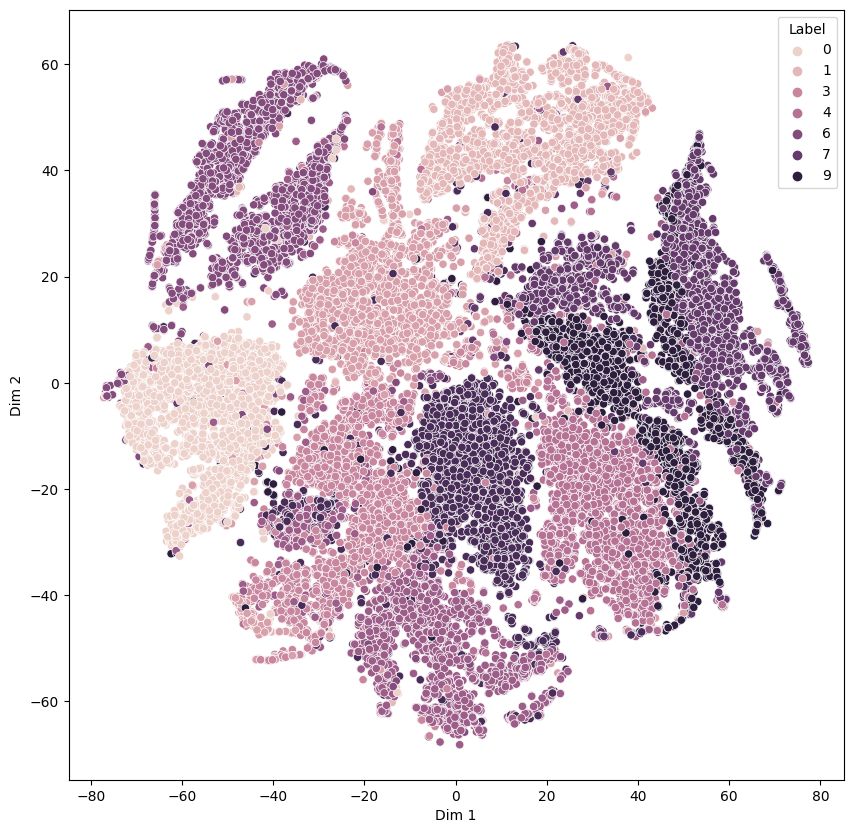

In [9]:
dat = np.column_stack((tsne_data, labs))
fin_data = pd.DataFrame(dat, columns = ('Dim 1', 'Dim 2', 'Label'))
fin_data['Label'] = fin_data['Label'].astype('int')
plt.figure(figsize = (10, 10))
sns.scatterplot(data = fin_data, x = 'Dim 1', y = 'Dim 2', hue = 'Label')
plt.show()

## Changing the perplexity to 50

In [10]:
tsne_2 = TSNE(n_components = 2, random_state = 0, perplexity = 50)
tsne_2_data = tsne_2.fit_transform(samp)

C:\Users\Neela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Neela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


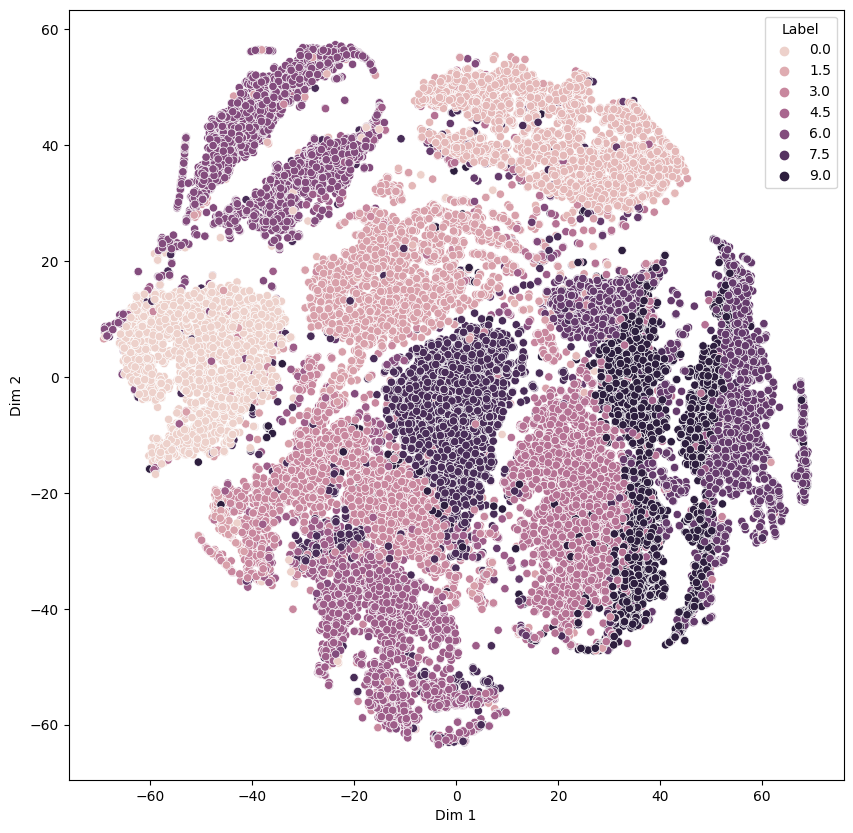

In [11]:
dat = np.column_stack((tsne_2_data, labs))
fin_data = pd.DataFrame(dat, columns = ('Dim 1', 'Dim 2', 'Label'))
plt.figure(figsize = (10, 10))
sns.scatterplot(data = fin_data, x = 'Dim 1', y = 'Dim 2', hue = 'Label')
plt.show()